# AL for surrogate LnL (linear regression test)

Test to run inference on some line data with a surrogate lnl likelihood trained on the line data's Gaussian Likelihood

20:09 bilby INFO    : Analysis priors:
20:09 bilby INFO    : m=Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)
20:09 bilby INFO    : c=Uniform(minimum=-2, maximum=2, name='c', latex_label='c', unit=None, boundary=None)
20:09 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
20:09 bilby INFO    : Analysis likelihood noise evidence: nan
20:09 bilby INFO    : Single likelihood evaluation took 7.495e-05 s
20:09 bilby INFO    : Using sampler Emcee with kwargs {'nwalkers': 50, 'a': 2, 'args': [], 'kwargs': {}, 'postargs': None, 'pool': None, 'live_dangerously': False, 'runtime_sortingfn': None, 'lnprob0': None, 'rstate0': None, 'blobs0': None, 'iterations': 100, 'thin': 1, 'storechain': True, 'mh_proposal': None}


  0%|          | 0/100 [00:00<?, ?it/s]

20:09 bilby INFO    : Checkpointing sampler to file out_inference_run/emcee_true_lnl/sampler.pickle
20:09 bilby INFO    : Max autocorr time = 23
20:09 bilby INFO    : Discarding 69 steps for burn-in
20:09 bilby INFO    : Sampling time: 0:00:01.867138
20:09 bilby INFO    : Summary of results:
nsamples: 1550
ln_noise_evidence:    nan
ln_evidence:    nan +/-    nan
ln_bayes_factor:    nan +/-    nan

2023-08-23 20:09:31.230 | INFO     | compas_surrogate.surrogate.models.model:_preprocess_and_split_data:112 - Training surrogate In((80, 2))-->Out((80, 1)) [testing:20]
|COMPAS-SUR|23/08 20:09:31|INFO| Training surrogate In((80, 2))-->Out((80, 1)) [testing:20] 


Training surrogate model


20:09 bilby INFO    : Running for label 'surr_lnl', output will be saved to 'out_inference_run'


Surrogate model saved


20:09 bilby INFO    : Analysis priors:
20:09 bilby INFO    : m=Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)
20:09 bilby INFO    : c=Uniform(minimum=-2, maximum=2, name='c', latex_label='c', unit=None, boundary=None)
20:09 bilby INFO    : Analysis likelihood class: <class 'compas_surrogate.surrogate.surrogate_likelihood.SurrogateLikelihood'>
20:09 bilby INFO    : Analysis likelihood noise evidence: nan
20:09 bilby INFO    : Single likelihood evaluation took 3.864e-04 s
20:09 bilby INFO    : Using sampler Emcee with kwargs {'nwalkers': 50, 'a': 2, 'args': [], 'kwargs': {}, 'postargs': None, 'pool': None, 'live_dangerously': False, 'runtime_sortingfn': None, 'lnprob0': None, 'rstate0': None, 'blobs0': None, 'iterations': 100, 'thin': 1, 'storechain': True, 'mh_proposal': None}


  0%|          | 0/100 [00:00<?, ?it/s]

20:09 bilby INFO    : Checkpointing sampler to file out_inference_run/emcee_surr_lnl/sampler.pickle
20:09 bilby INFO    : Max autocorr time = 20
20:09 bilby INFO    : Discarding 60 steps for burn-in
20:09 bilby INFO    : Sampling time: 0:00:03.123357
20:09 bilby INFO    : Summary of results:
nsamples: 2000
ln_noise_evidence:    nan
ln_evidence:    nan +/-    nan
ln_bayes_factor:    nan +/-    nan



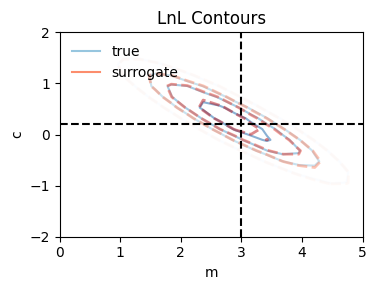

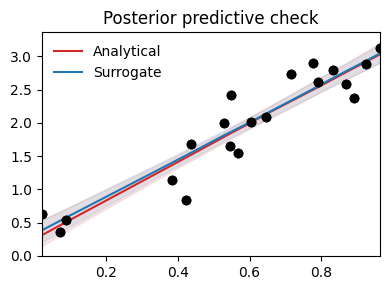

20:09 bilby INFO    : Running for label 'true_lnl', output will be saved to 'out_inference_run'
20:09 bilby INFO    : Analysis priors:
20:09 bilby INFO    : m=Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)
20:09 bilby INFO    : c=Uniform(minimum=-2, maximum=2, name='c', latex_label='c', unit=None, boundary=None)
20:09 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
20:09 bilby INFO    : Analysis likelihood noise evidence: nan
20:09 bilby INFO    : Single likelihood evaluation took 9.462e-05 s
20:09 bilby WARNING : Using cached result
20:09 bilby INFO    : Summary of results:
nsamples: 1550
ln_noise_evidence:    nan
ln_evidence:    nan +/-    nan
ln_bayes_factor:    nan +/-    nan

20:09 bilby INFO    : Running for label 'surr_lnl', output will be saved to 'out_inference_run'
20:09 bilby INFO    : Analysis priors:
20:09 bilby INFO    : m=Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, b

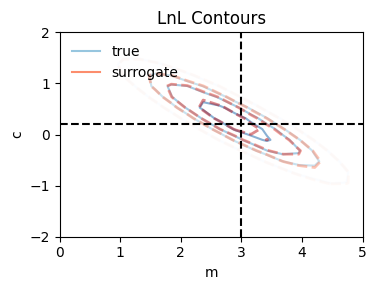

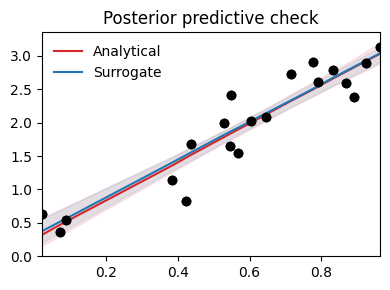

In [17]:

import os
from typing import Callable

import bilby
import matplotlib.pyplot as plt
import numpy as np

from compas_surrogate.surrogate.models import SklearnGPModel
from compas_surrogate.surrogate.surrogate_likelihood import SurrogateLikelihood

np.random.seed(0)

SIGMA = 0.25
M_RANGE = (0, 5)
C_RANGE = (-2, 2)
OUTDIR = "out_inference_run"


def get_priors():
    priors = dict()
    priors["m"] = bilby.core.prior.Uniform(*M_RANGE, "m")
    priors["c"] = bilby.core.prior.Uniform(*C_RANGE, "c")
    return bilby.core.prior.PriorDict(priors)


def get_prior_samples_in_grid(n_grid_cells=20):
    m, c = np.meshgrid(
        np.linspace(*M_RANGE, n_grid_cells),
        np.linspace(*C_RANGE, n_grid_cells),
    )
    m, c = m.ravel(), c.ravel()
    return np.array([m, c]).T


def generate_observed_data(
    func: Callable, func_kwargs, n=50, sigma=SIGMA
) -> np.ndarray:
    x = np.random.uniform(0, 1, n)
    x = np.sort(x)
    y = func(x, **func_kwargs) + np.random.normal(0, sigma, n)
    X = [[i] for i in x]
    Y = [[i] for i in y]
    return np.array([X, Y])


def get_likelihood_fn(x_data, obs_y_data, model) -> Callable:
    return bilby.core.likelihood.GaussianLikelihood(
        x_data, obs_y_data, model, sigma=SIGMA
    )


def get_likelihood_surrogate(lnl, clean=False) -> bilby.likelihood.Likelihood:
    model_path = f"{OUTDIR}/surr_model"
    if clean or not os.path.exists(model_path):
        print("Training surrogate model")
        mc_samples = get_prior_samples_in_grid(n_grid_cells=10)
        lnl = generate_lnl_data(lnl, mc_samples[:, 0], mc_samples[:, 1])
        lnl = lnl.reshape(-1, 1)
        model = SklearnGPModel()
        model.train(mc_samples, lnl, verbose=True)
        model.save(model_path)
        print("Surrogate model saved")
    else:
        model = SklearnGPModel.load(model_path)

    likelihood = SurrogateLikelihood(model, ["m", "c"])
    return likelihood


def generate_lnl_data(lnl, m, c) -> np.ndarray:
    n = len(m)
    lnl_vals = np.zeros(n)
    if isinstance(lnl, SurrogateLikelihood):
        _, lnl_vals, _ = lnl.surr(np.array([m, c]).T)
        lnl_vals = lnl_vals.ravel()
    else:
        for i, (m_i, c_i) in enumerate(zip(m, c)):
            lnl.parameters = {"m": m_i, "c": c_i, "sigma": SIGMA}
            lnl_vals[i] = lnl.log_likelihood()
    return lnl_vals


def plot_lnl_surface(
    lnl,
    true_vals,
    label="true",
    cmap="viridis",
    fig=None,
    savefn=None,
    kwgs={},
):
    samples = get_prior_samples_in_grid(n_grid_cells=20)
    m, c = samples[:, 0], samples[:, 1]
    lnl_vals = generate_lnl_data(lnl, m, c)

    if fig is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    else:
        ax = fig.get_axes()[0]

    levels = np.array([-50, -30, -20, -10, 0])
    # contour plot
    cmap = plt.get_cmap(
        cmap,
    )
    cset = ax.contour(
        m.reshape(20, 20),
        c.reshape(20, 20),
        lnl_vals.reshape(20, 20),
        cmap=cmap,
        levels=levels,
        alpha=0.5,
        **kwgs,
    )
    if "ls" in kwgs:
        for c in cset.collections:
            c.set_linestyle(kwgs["ls"])
    if "lw" in kwgs:
        for c in cset.collections:
            c.set_linewidth(kwgs["lw"])

    ax.plot(-100, -100, label=label, color=cmap(100))

    ax.set_xlabel("m")
    ax.set_xlim(*M_RANGE)
    ax.set_ylabel("c")
    ax.set_ylim(*C_RANGE)

    if savefn is not None:
        ax.axvline(true_vals["m"], color="k", linestyle="--")
        plt.axhline(true_vals["c"], color="k", linestyle="--")
        plt.title("LnL Contours")
        plt.tight_layout()
        plt.legend(frameon=False)
        fig.savefig(savefn, dpi=300)
    return fig


def plot_corner(result: bilby.result.Result, color="k", fig=None, savefn=None):
    if fig is None:
        fig = result.plot_corner(color=color)
    else:
        result.plot_corner(fig=fig, color=color)

    if savefn is not None:
        fig.savefig(savefn, dpi=300)
    return fig


def plot_posterior_predictive_check(
    obs,
    model,
    posterior,
    label="true",
    color="tab:blue",
    fig=None,
    savefn=None,
    **kwargs,
):
    # take 100 random samples from the posterior
    post = posterior.sample(100).to_numpy().T
    m, c = post[0], post[1]
    ys = np.array(model(obs[0], m, c))
    y_low, y_mean, y_up = np.quantile(ys, [0.05, 0.5, 0.95], axis=1)

    if fig is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    else:
        ax = fig.get_axes()[0]
    ax.scatter(obs[0].flatten(), obs[1].flatten(), color="k", zorder=10)
    ax.plot(obs[0], y_mean, label=label, color=color)
    ax.fill_between(obs[0].flatten(), y_low, y_up, alpha=0.1, color=color)
    ax.set_xlim(obs[0].min(), obs[0].max())
    if savefn is not None:
        plt.title("Posterior predictive check")
        plt.legend(frameon=False)
        plt.tight_layout()
        fig.savefig(savefn, dpi=300)
    return fig


def test_inference_run(clean=False):
    model = lambda x, m, c: x * m + c
    true_parameters = dict(m=3, c=0.2)
    obs_data = generate_observed_data(model, true_parameters, n=20)
    prior = get_priors()

    true_lnl = get_likelihood_fn(obs_data[0], obs_data[1], model)
    normal_result = bilby.run_sampler(
        likelihood=true_lnl,
        priors=prior,
        sampler="emcee",
        injection_parameters=true_parameters,
        nwalkers=50,
        outdir=OUTDIR,
        label="true_lnl",
        clean=clean,
    )

    surrogate_lnl = get_likelihood_surrogate(true_lnl, clean=clean)
    surr_result = bilby.run_sampler(
        likelihood=surrogate_lnl,
        priors=prior,
        sampler="emcee",
        injection_parameters=true_parameters,
        nwalkers=50,
        outdir=OUTDIR,
        label="surr_lnl",
    )

    lnl_surf_fig = plot_lnl_surface(
        true_lnl, true_parameters, label="true", cmap="Blues"
    )
    plot_lnl_surface(
        surrogate_lnl,
        true_parameters,
        cmap="Reds",
        label="surrogate",
        fig=lnl_surf_fig,
        savefn=f"{OUTDIR}/lnl_surf.png",
        kwgs=dict(ls="--", lw=2),
    )
    ppc = plot_posterior_predictive_check(
        obs_data,
        model,
        normal_result.posterior,
        label="Analytical",
        color="tab:red",
    )
    plot_posterior_predictive_check(
        obs_data,
        model,
        surr_result.posterior,
        label="Surrogate",
        color="tab:blue",
        fig=ppc,
        savefn=f"{OUTDIR}/ppc.png",
    )

    crner = plot_corner(normal_result, color="tab:red")
    plot_corner(surr_result, color="tab:blue", fig=crner, savefn=f"{OUTDIR}/corner.png")


if __name__ == "__main__":
    test_inference_run()